In [458]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [459]:
df = pd.read_csv("../../data/Leases.csv")
count_table = df['market'].value_counts().reset_index()
count_table

,market,count
0,Manhattan,16961
1,Houston,16014
2,Los Angeles,15571
3,Dallas/Ft Worth,15272
4,South Florida,11919
5,Denver,8957
6,Boston,8236
7,Atlanta,7739
8,Phoenix,7379
9,Orange County,7196


In [460]:
df_relevant = df[['year','quarter', 'market', 'region', 'city', 'state', 'internal_class', 'leasedSF', 'RBA', 'availability_proportion', 'internal_class_rent', 'overall_rent']]
#df_relevant = df_relevant[df_relevant['market'] != 'San Francisco']
df_relevant['id'] = df_relevant['year'].astype(str) + " " + df_relevant['state']

df_relevant

/var/folders/4g/nqxcgmps22dbx0qvs4pk9mdh0000gn/T/ipykernel_78251/4286013854.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_relevant['id'] = df_relevant['year'].astype(str) + " " + df_relevant['state']


,year,quarter,market,region,city,state,internal_class,leasedSF,RBA,availability_proportion,internal_class_rent,overall_rent,id
0,2018,Q1,Atlanta,South,Atlanta,GA,A,24736.0,101140416.0,0.200109,27.655891,24.345689,2018 GA
1,2018,Q1,Atlanta,South,Atlanta,GA,A,965.0,101140416.0,0.200109,27.655891,24.345689,2018 GA
2,2018,Q1,Atlanta,South,Atlanta,GA,A,2215.0,101140416.0,0.200109,27.655891,24.345689,2018 GA
3,2018,Q1,Atlanta,South,Atlanta,GA,O,1925.0,65810449.0,0.193419,18.560886,24.345689,2018 GA
4,2018,Q1,Atlanta,South,Atlanta,GA,A,2404.0,101140416.0,0.200109,27.655891,24.345689,2018 GA
...,...,...,...,...,...,...,...,...,...,...,...,...,...
194680,2024,Q4,Tampa,South,Tampa,FL,A,19654.0,25106444.0,0.230000,32.980000,29.460000,2024 FL
194681,2024,Q4,Tampa,South,Tampa,FL,A,16224.0,25106444.0,0.230000,32.980000,29.460000,2024 FL
194682,2024,Q4,Tampa,South,Tampa,FL,O,8475.0,29139850.0,0.168000,25.600000,29.460000,2024 FL
194683,2024,Q4,Tampa,South,Tampa,FL,A,2014.0,25106444.0,0.230000,32.980000,29.460000,2024 FL


In [461]:
df_unemp = pd.read_csv('../../data/unemployment.csv')
df_unemp = df_unemp.groupby(['year', 'state']).agg({
    'unemployment_rate' : 'mean'
    }).reset_index()
df_unemp['id'] = df_unemp['year'].astype(str) + " " + df_unemp['state']
df_unemp
merged_df = pd.merge(df_relevant, df_unemp, on='id', how='inner')  # or 'left', 'right', 'outer'
merged_df

,year_x,quarter,market,region,city,state_x,internal_class,leasedSF,RBA,availability_proportion,internal_class_rent,overall_rent,id,year_y,state_y,unemployment_rate
0,2018,Q1,Atlanta,South,Atlanta,GA,A,24736.0,101140416.0,0.200109,27.655891,24.345689,2018 GA,2018,GA,4.000
1,2018,Q1,Atlanta,South,Atlanta,GA,A,965.0,101140416.0,0.200109,27.655891,24.345689,2018 GA,2018,GA,4.000
2,2018,Q1,Atlanta,South,Atlanta,GA,A,2215.0,101140416.0,0.200109,27.655891,24.345689,2018 GA,2018,GA,4.000
3,2018,Q1,Atlanta,South,Atlanta,GA,O,1925.0,65810449.0,0.193419,18.560886,24.345689,2018 GA,2018,GA,4.000
4,2018,Q1,Atlanta,South,Atlanta,GA,A,2404.0,101140416.0,0.200109,27.655891,24.345689,2018 GA,2018,GA,4.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194680,2024,Q4,Tampa,South,Tampa,FL,A,19654.0,25106444.0,0.230000,32.980000,29.460000,2024 FL,2024,FL,3.275
194681,2024,Q4,Tampa,South,Tampa,FL,A,16224.0,25106444.0,0.230000,32.980000,29.460000,2024 FL,2024,FL,3.275
194682,2024,Q4,Tampa,South,Tampa,FL,O,8475.0,29139850.0,0.168000,25.600000,29.460000,2024 FL,2024,FL,3.275
194683,2024,Q4,Tampa,South,Tampa,FL,A,2014.0,25106444.0,0.230000,32.980000,29.460000,2024 FL,2024,FL,3.275


In [462]:
df_average = merged_df.groupby(['year_x', 'quarter', 'market', 'internal_class']).agg({
    'leasedSF': 'mean',
    'availability_proportion' : 'mean',
    'internal_class_rent' : 'mean',
    'overall_rent' : 'mean',
    'leasedSF' : 'mean',
    'RBA' : 'mean',
    'unemployment_rate' : 'mean'
    }).reset_index()
df_average.rename(columns={'year_x': 'year'}, inplace=True)
df_average


,year,quarter,market,internal_class,leasedSF,availability_proportion,internal_class_rent,overall_rent,RBA,unemployment_rate
0,2018,Q1,Atlanta,A,9245.769231,0.200109,27.655891,24.345689,101140416.0,4.000000
1,2018,Q1,Atlanta,O,4449.100000,0.193419,18.560886,24.345689,65810449.0,4.000000
2,2018,Q1,Austin,A,16182.103774,0.116311,40.384706,36.596618,36815073.0,3.900000
3,2018,Q1,Austin,O,1978.108696,0.121082,30.118658,36.596618,27947525.0,3.900000
4,2018,Q1,Baltimore,A,6662.877193,0.166045,27.104835,22.954034,41033288.0,3.816667
...,...,...,...,...,...,...,...,...,...,...
1619,2024,Q4,Southern Maryland,O,3352.465116,NaN,NaN,NaN,NaN,2.758333
1620,2024,Q4,Tampa,A,15105.568627,0.230000,32.980000,29.460000,25106444.0,3.275000
1621,2024,Q4,Tampa,O,2985.311927,0.168000,25.600000,29.460000,29139850.0,3.275000
1622,2024,Q4,Washington D.C.,A,18763.000000,NaN,NaN,NaN,NaN,5.408333


In [463]:
df_cleaned = df_average.dropna(subset=['availability_proportion', 'internal_class_rent'])
df_cleaned


,year,quarter,market,internal_class,leasedSF,availability_proportion,internal_class_rent,overall_rent,RBA,unemployment_rate
0,2018,Q1,Atlanta,A,9245.769231,0.200109,27.655891,24.345689,101140416.0,4.000000
1,2018,Q1,Atlanta,O,4449.100000,0.193419,18.560886,24.345689,65810449.0,4.000000
2,2018,Q1,Austin,A,16182.103774,0.116311,40.384706,36.596618,36815073.0,3.900000
3,2018,Q1,Austin,O,1978.108696,0.121082,30.118658,36.596618,27947525.0,3.900000
4,2018,Q1,Baltimore,A,6662.877193,0.166045,27.104835,22.954034,41033288.0,3.816667
...,...,...,...,...,...,...,...,...,...,...
1613,2024,Q4,Seattle,O,4053.008197,0.241766,35.780000,45.200000,52684309.0,4.741667
1616,2024,Q4,South Florida,A,6530.568889,0.202000,54.660000,47.700000,55208986.0,3.275000
1617,2024,Q4,South Florida,O,2641.686833,0.150000,37.010000,47.700000,51408267.0,3.275000
1620,2024,Q4,Tampa,A,15105.568627,0.230000,32.980000,29.460000,25106444.0,3.275000


In [464]:
df_year = df_cleaned.groupby(['year', 'market', 'internal_class']).agg({
    'leasedSF': 'mean',
    'availability_proportion' : 'mean',
    'internal_class_rent' : 'mean',
    'overall_rent' : 'mean',
    'leasedSF' : 'mean',
    'RBA' : 'mean',
    'unemployment_rate' : 'mean'
    }).reset_index()
df_year

,year,market,internal_class,leasedSF,availability_proportion,internal_class_rent,overall_rent,RBA,unemployment_rate
0,2018,Atlanta,A,9628.846990,0.205405,28.974497,25.823866,1.029397e+08,4.000000
1,2018,Atlanta,O,4234.521137,0.187524,20.035054,25.823866,6.597772e+07,4.000000
2,2018,Austin,A,12539.228572,0.118624,39.658007,35.604411,3.712689e+07,3.900000
3,2018,Austin,O,3346.342617,0.123462,29.693692,35.604411,2.794752e+07,3.900000
4,2018,Baltimore,A,5924.403524,0.170479,27.031583,23.348709,4.128226e+07,3.816667
...,...,...,...,...,...,...,...,...,...
289,2024,Seattle,O,4465.269970,0.248231,35.795199,45.458051,5.231500e+07,4.741667
290,2024,South Florida,A,6342.998964,0.205473,52.089803,45.370039,5.505108e+07,3.275000
291,2024,South Florida,O,2695.508959,0.163101,36.155148,45.370039,5.114081e+07,3.275000
292,2024,Tampa,A,10540.680351,0.244207,33.189818,29.586111,2.499644e+07,3.275000


In [465]:
df_year['absorption'] = df_year['leasedSF']/df_year['RBA']*100000
df_year_A = df_year[df_year["internal_class"] == 'A']
df_year_O = df_year[df_year["internal_class"] == 'O']
df_year_A


,year,market,internal_class,leasedSF,availability_proportion,internal_class_rent,overall_rent,RBA,unemployment_rate,absorption
0,2018,Atlanta,A,9628.846990,0.205405,28.974497,25.823866,1.029397e+08,4.000000,9.353872
2,2018,Austin,A,12539.228572,0.118624,39.658007,35.604411,3.712689e+07,3.900000,33.773979
4,2018,Baltimore,A,5924.403524,0.170479,27.031583,23.348709,4.128226e+07,3.816667,14.350966
6,2018,Boston,A,12303.956380,0.136360,42.657058,32.983928,1.332292e+08,3.438171,9.235182
8,2018,Charlotte,A,13079.149401,0.163030,29.541666,26.929282,3.681976e+07,3.988644,35.522096
...,...,...,...,...,...,...,...,...,...,...
284,2024,San Diego,A,7622.318673,0.266555,46.562107,41.776359,3.226413e+07,5.300000,23.624743
286,2024,San Francisco,A,14884.428490,0.344625,74.881041,68.397889,5.638299e+07,5.300000,26.398790
288,2024,Seattle,A,13285.769792,0.300871,50.850166,45.458051,7.120877e+07,4.741667,18.657492
290,2024,South Florida,A,6342.998964,0.205473,52.089803,45.370039,5.505108e+07,3.275000,11.522024


In [466]:
# First ensure data is sorted by market and year
df_sorted_A = df_year_A.sort_values(['market', 'year'])
# Create a new column with percentage increase compared to previous year
df_sorted_A['rent_growth'] = df_sorted_A.groupby('market')['internal_class_rent'].pct_change() * 100
df_sorted_A['rent_growth'] = df_sorted_A['rent_growth'].fillna(0)

df_sorted_A['availability_growth'] = df_sorted_A.groupby('market')['availability_proportion'].pct_change() * 100
df_sorted_A['availability_growth'] = df_sorted_A['availability_growth'].fillna(0)

df_sorted_A

,year,market,internal_class,leasedSF,availability_proportion,internal_class_rent,overall_rent,RBA,unemployment_rate,absorption,rent_growth,availability_growth
0,2018,Atlanta,A,9628.846990,0.205405,28.974497,25.823866,1.029397e+08,4.000000,9.353872,0.000000,0.000000
42,2019,Atlanta,A,11016.343476,0.206266,30.379910,27.234913,1.040834e+08,3.575000,10.584151,4.850518,0.418756
84,2020,Atlanta,A,10413.860650,0.240211,32.385357,29.212861,1.061802e+08,6.500000,9.807725,6.601226,16.457213
126,2021,Atlanta,A,8641.893893,0.287618,32.543294,29.864276,1.082281e+08,3.933333,7.984888,0.487679,19.735515
168,2022,Atlanta,A,8358.160661,0.301789,33.199192,30.682647,1.091262e+08,3.141667,7.659172,2.015463,4.926869
...,...,...,...,...,...,...,...,...,...,...,...,...
124,2020,Tampa,A,8528.362386,0.158688,31.001773,26.169932,2.343058e+07,8.191667,36.398429,-0.743564,13.427635
166,2021,Tampa,A,8953.590745,0.219696,31.930084,27.277867,2.380636e+07,4.691667,37.610078,2.994382,38.445906
208,2022,Tampa,A,8964.595017,0.231172,32.663850,28.240654,2.408221e+07,2.991667,37.224967,2.298038,5.223285
250,2023,Tampa,A,7524.950069,0.240906,32.338345,28.509292,2.422815e+07,2.908333,31.058703,-0.996528,4.210844


In [467]:
# First ensure data is sorted by market and year
df_sorted_O = df_year_O.sort_values(['market', 'year'])
# Create a new column with percentage increase compared to previous year
df_sorted_O['rent_growth'] = df_sorted_O.groupby('market')['internal_class_rent'].pct_change() * 100
df_sorted_O['rent_growth'] = df_sorted_O['rent_growth'].fillna(0)

df_sorted_O['availability_growth'] = df_sorted_O.groupby('market')['availability_proportion'].pct_change() * 100
df_sorted_O['availability_growth'] = df_sorted_O['availability_growth'].fillna(0)

df_sorted_O

,year,market,internal_class,leasedSF,availability_proportion,internal_class_rent,overall_rent,RBA,unemployment_rate,absorption,rent_growth,availability_growth
1,2018,Atlanta,O,4234.521137,0.187524,20.035054,25.823866,65977716.25,4.000000,6.418108,0.000000,0.000000
43,2019,Atlanta,O,4745.760471,0.175431,20.961762,27.234913,66386564.00,3.575000,7.148676,4.625436,-6.448553
85,2020,Atlanta,O,3324.070559,0.192106,22.130277,29.212861,66188105.50,6.500000,5.022157,5.574504,9.505091
127,2021,Atlanta,O,3524.484575,0.219384,23.431151,29.864276,65591928.50,3.933333,5.373351,5.878255,14.199462
169,2022,Atlanta,O,5094.064520,0.194369,23.620519,30.682647,65255449.00,3.141667,7.806344,0.808189,-11.402538
...,...,...,...,...,...,...,...,...,...,...,...,...
125,2020,Tampa,O,4644.824800,0.165174,22.506323,26.169932,28177582.00,8.191667,16.484114,4.402873,1.204920
167,2021,Tampa,O,3962.634543,0.171926,23.333051,27.277867,28662957.00,4.691667,13.824933,3.673311,4.087788
209,2022,Tampa,O,3781.186899,0.183647,24.302225,28.240654,28896385.00,2.991667,13.085328,4.153655,6.817143
251,2023,Tampa,O,3285.545472,0.172364,24.748437,28.509292,28943310.00,2.908333,11.351658,1.836094,-6.143627


In [468]:
df_sorted_A['enhanced_growth'] = -1*df_sorted_A['rent_growth'] + df_sorted_A['availability_growth']
df_sorted_O['enhanced_growth'] = -1*df_sorted_O['rent_growth'] + df_sorted_O['availability_growth']

In [469]:
# First ensure data is sorted by market and year
df_double_sorted_A = df_sorted_A.sort_values(['market', 'year'])
# Calculate cumulative growth factor within each market
df_double_sorted_A['cumulative_growth_factor'] = df_double_sorted_A.groupby('market')['enhanced_growth'].cumsum()

# First ensure data is sorted by market and year
df_double_sorted_O = df_sorted_O.sort_values(['market', 'year'])
# Calculate cumulative growth factor within each market
df_double_sorted_O['cumulative_growth_factor'] = df_double_sorted_O.groupby('market')['enhanced_growth'].cumsum()

In [470]:
df_double_sorted_A['unemp_growth'] = df_double_sorted_A.groupby('market')['unemployment_rate'].pct_change() * 10
df_double_sorted_A['unemp_growth'] = df_double_sorted_A['unemp_growth'].fillna(0)
df_double_sorted_A['abs_growth'] = df_double_sorted_A.groupby('market')['absorption'].pct_change() * 10
df_double_sorted_A['abs_growth'] = df_double_sorted_A['abs_growth'].fillna(0)
df_double_sorted_A

,year,market,internal_class,leasedSF,availability_proportion,internal_class_rent,overall_rent,RBA,unemployment_rate,absorption,rent_growth,availability_growth,enhanced_growth,cumulative_growth_factor,unemp_growth,abs_growth
0,2018,Atlanta,A,9628.846990,0.205405,28.974497,25.823866,1.029397e+08,4.000000,9.353872,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
42,2019,Atlanta,A,11016.343476,0.206266,30.379910,27.234913,1.040834e+08,3.575000,10.584151,4.850518,0.418756,-4.431762,-4.431762,-1.062500,1.315261
84,2020,Atlanta,A,10413.860650,0.240211,32.385357,29.212861,1.061802e+08,6.500000,9.807725,6.601226,16.457213,9.855986,5.424224,8.181818,-0.733574
126,2021,Atlanta,A,8641.893893,0.287618,32.543294,29.864276,1.082281e+08,3.933333,7.984888,0.487679,19.735515,19.247836,24.672060,-3.948718,-1.858572
168,2022,Atlanta,A,8358.160661,0.301789,33.199192,30.682647,1.091262e+08,3.141667,7.659172,2.015463,4.926869,2.911406,27.583467,-2.012712,-0.407916
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,2020,Tampa,A,8528.362386,0.158688,31.001773,26.169932,2.343058e+07,8.191667,36.398429,-0.743564,13.427635,14.171199,26.648221,15.205128,-0.541110
166,2021,Tampa,A,8953.590745,0.219696,31.930084,27.277867,2.380636e+07,4.691667,37.610078,2.994382,38.445906,35.451524,62.099745,-4.272635,0.332885
208,2022,Tampa,A,8964.595017,0.231172,32.663850,28.240654,2.408221e+07,2.991667,37.224967,2.298038,5.223285,2.925247,65.024991,-3.623446,-0.102396
250,2023,Tampa,A,7524.950069,0.240906,32.338345,28.509292,2.422815e+07,2.908333,31.058703,-0.996528,4.210844,5.207371,70.232363,-0.278552,-1.656486


In [471]:
df_double_sorted_O['unemp_growth'] = df_double_sorted_O.groupby('market')['unemployment_rate'].pct_change() * 10
df_double_sorted_O['unemp_growth'] = df_double_sorted_O['unemp_growth'].fillna(0)
df_double_sorted_O['abs_growth'] = df_double_sorted_O.groupby('market')['absorption'].pct_change() * 10
df_double_sorted_O['abs_growth'] = df_double_sorted_O['abs_growth'].fillna(0)
df_double_sorted_O

,year,market,internal_class,leasedSF,availability_proportion,internal_class_rent,overall_rent,RBA,unemployment_rate,absorption,rent_growth,availability_growth,enhanced_growth,cumulative_growth_factor,unemp_growth,abs_growth
1,2018,Atlanta,O,4234.521137,0.187524,20.035054,25.823866,65977716.25,4.000000,6.418108,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
43,2019,Atlanta,O,4745.760471,0.175431,20.961762,27.234913,66386564.00,3.575000,7.148676,4.625436,-6.448553,-11.073989,-11.073989,-1.062500,1.138292
85,2020,Atlanta,O,3324.070559,0.192106,22.130277,29.212861,66188105.50,6.500000,5.022157,5.574504,9.505091,3.930586,-7.143402,8.181818,-2.974703
127,2021,Atlanta,O,3524.484575,0.219384,23.431151,29.864276,65591928.50,3.933333,5.373351,5.878255,14.199462,8.321207,1.177805,-3.948718,0.699289
169,2022,Atlanta,O,5094.064520,0.194369,23.620519,30.682647,65255449.00,3.141667,7.806344,0.808189,-11.402538,-12.210727,-11.032922,-2.012712,4.527887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,2020,Tampa,O,4644.824800,0.165174,22.506323,26.169932,28177582.00,8.191667,16.484114,4.402873,1.204920,-3.197952,-7.748629,15.205128,1.112148
167,2021,Tampa,O,3962.634543,0.171926,23.333051,27.277867,28662957.00,4.691667,13.824933,3.673311,4.087788,0.414477,-7.334153,-4.272635,-1.613178
209,2022,Tampa,O,3781.186899,0.183647,24.302225,28.240654,28896385.00,2.991667,13.085328,4.153655,6.817143,2.663487,-4.670665,-3.623446,-0.534979
251,2023,Tampa,O,3285.545472,0.172364,24.748437,28.509292,28943310.00,2.908333,11.351658,1.836094,-6.143627,-7.979722,-12.650387,-0.278552,-1.324897


In [ ]:
df_double_sorted_O['enhanced_growth'] = df_double_sorted_O['enhanced_growth'] + -0.25*df_double_sorted_O['unemp_growth'] + 1.5*df_double_sorted_O['abs_growth']

,year,market,internal_class,leasedSF,availability_proportion,internal_class_rent,overall_rent,RBA,unemployment_rate,absorption,rent_growth,availability_growth,enhanced_growth,cumulative_growth_factor,unemp_growth,abs_growth
1,2018,Atlanta,O,4234.521137,0.187524,20.035054,25.823866,65977716.25,4.000000,6.418108,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
43,2019,Atlanta,O,4745.760471,0.175431,20.961762,27.234913,66386564.00,3.575000,7.148676,4.625436,-6.448553,-9.100926,-11.073989,-1.062500,1.138292
85,2020,Atlanta,O,3324.070559,0.192106,22.130277,29.212861,66188105.50,6.500000,5.022157,5.574504,9.505091,-2.576923,-7.143402,8.181818,-2.974703
127,2021,Atlanta,O,3524.484575,0.219384,23.431151,29.864276,65591928.50,3.933333,5.373351,5.878255,14.199462,10.357321,1.177805,-3.948718,0.699289
169,2022,Atlanta,O,5094.064520,0.194369,23.620519,30.682647,65255449.00,3.141667,7.806344,0.808189,-11.402538,-4.915719,-11.032922,-2.012712,4.527887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,2020,Tampa,O,4644.824800,0.165174,22.506323,26.169932,28177582.00,8.191667,16.484114,4.402873,1.204920,-5.331012,-7.748629,15.205128,1.112148
167,2021,Tampa,O,3962.634543,0.171926,23.333051,27.277867,28662957.00,4.691667,13.824933,3.673311,4.087788,-0.937132,-7.334153,-4.272635,-1.613178
209,2022,Tampa,O,3781.186899,0.183647,24.302225,28.240654,28896385.00,2.991667,13.085328,4.153655,6.817143,2.766881,-4.670665,-3.623446,-0.534979
251,2023,Tampa,O,3285.545472,0.172364,24.748437,28.509292,28943310.00,2.908333,11.351658,1.836094,-6.143627,-9.897429,-12.650387,-0.278552,-1.324897


In [473]:
# First ensure data is sorted by market and year
merged_sorted_df_O = df_double_sorted_O.sort_values(['market', 'year'])
# Calculate cumulative growth factor within each market
merged_sorted_df_O['cumulative_growth_factor'] = merged_sorted_df_O.groupby('market')['enhanced_growth'].cumsum()
merged_sorted_df_O.to_csv('dfoSF1.csv', index=False)

In [474]:
df_double_sorted_A['enhanced_growth'] = df_double_sorted_A['enhanced_growth'] + -0.25*df_double_sorted_A['unemp_growth']+ 1.5*df_double_sorted_A['abs_growth']
# First ensure data is sorted by market and year
merged_sorted_df_A = df_double_sorted_A.sort_values(['market', 'year'])
# Calculate cumulative growth factor within each market
merged_sorted_df_A['cumulative_growth_factor'] = merged_sorted_df_A.groupby('market')['enhanced_growth'].cumsum()
#merged_sorted_df_A.to_csv('dfaSF1.csv', index=False)


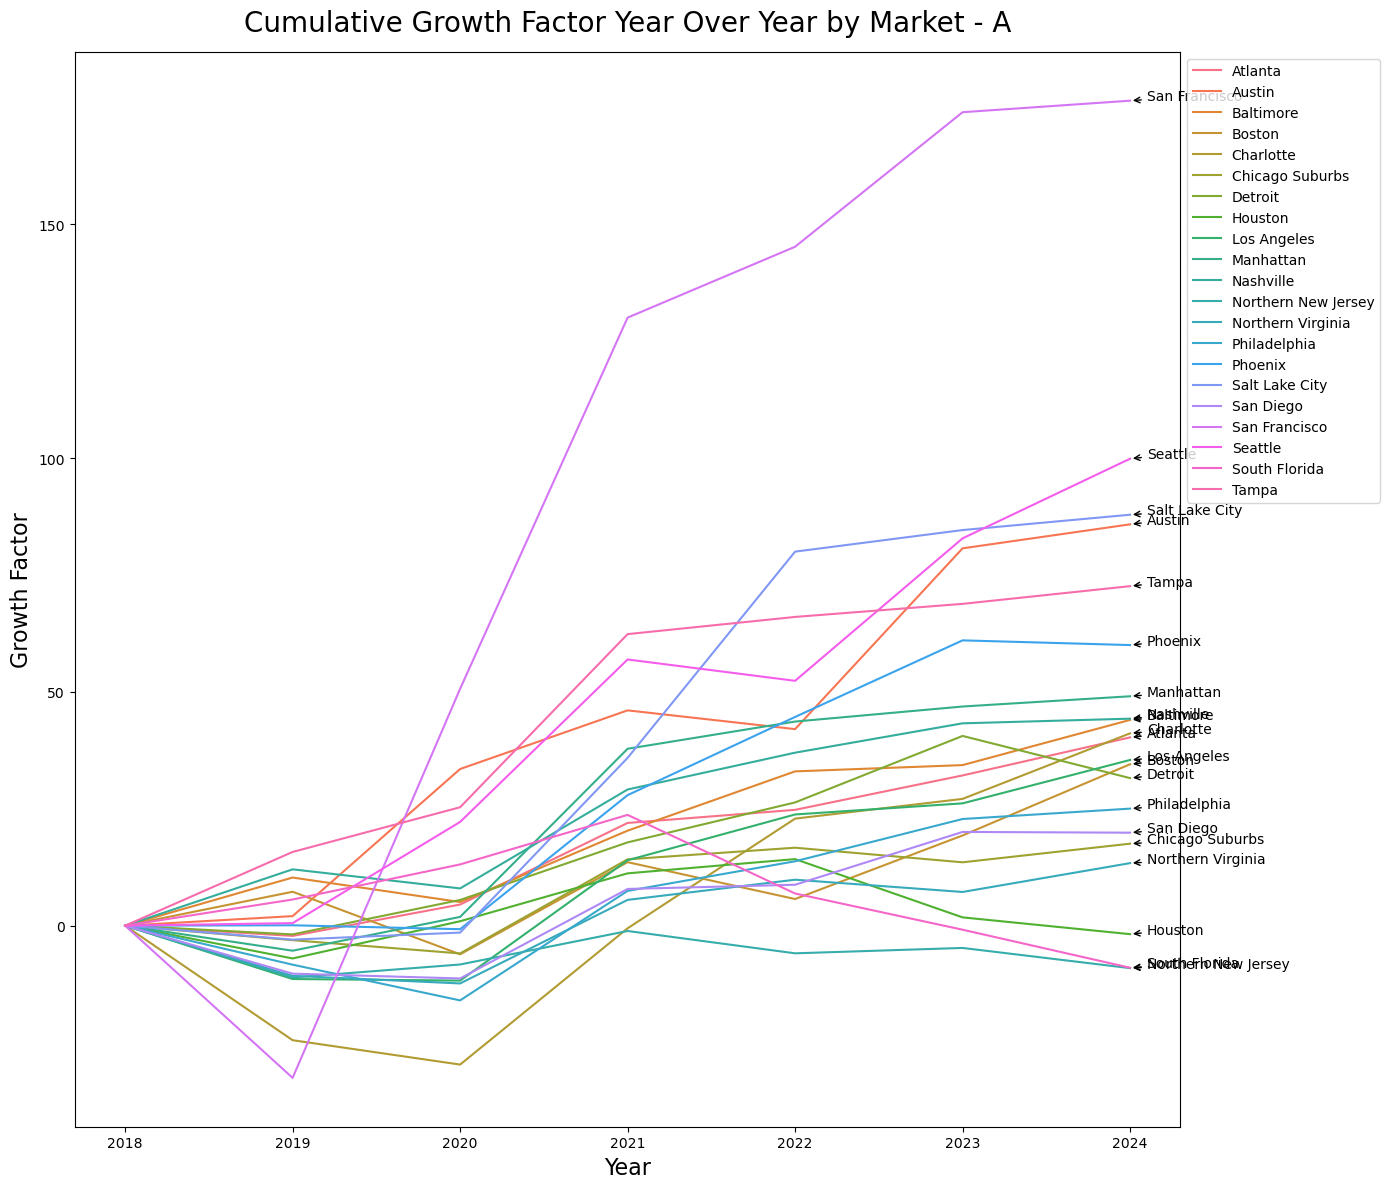

In [475]:
plt.figure(figsize=(14, 12))
sns.lineplot(data=merged_sorted_df_A, x='year', y='cumulative_growth_factor', hue='market', errorbar=None)
plt.title('Cumulative Growth Factor Year Over Year by Market - A', fontsize = 20, pad=15)
plt.xlabel('Year', fontsize = 16)
plt.ylabel('Growth Factor', fontsize = 16)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

for market in merged_sorted_df_A['market'].unique():
    # Get the last data point for each market (or you can use other points if preferred)
    last_year = merged_sorted_df_A[merged_sorted_df_A['market'] == market]['year'].max()
    last_value = merged_sorted_df_A[merged_sorted_df_A['market'] == market].loc[merged_sorted_df_A['year'] == last_year, 'cumulative_growth_factor'].values[0]
    
    # Annotate the plot with the market name
    plt.annotate(market, 
                 xy=(last_year, last_value), 
                 xytext=(last_year + 0.1, last_value + 0.1),  # Adjust the text position
                 arrowprops=dict(arrowstyle="->", color='black'),
                 fontsize=10)


plt.tight_layout()
plt.show()

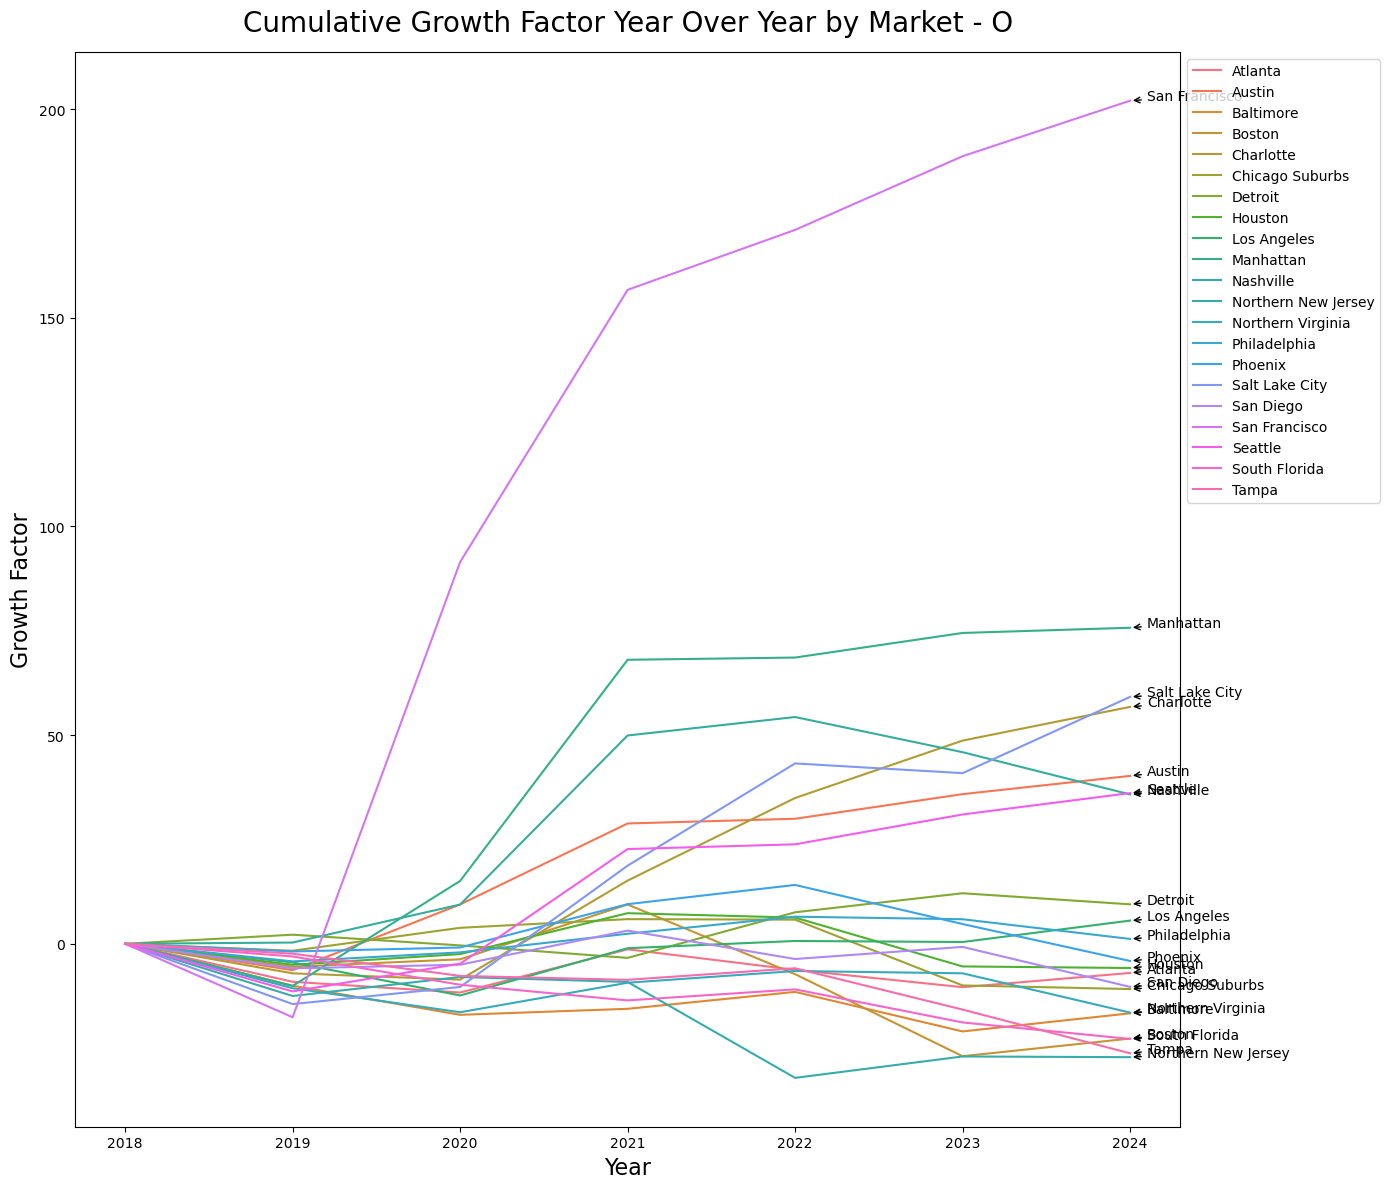

In [476]:
plt.figure(figsize=(14, 12))
sns.lineplot(data=merged_sorted_df_O, x='year', y='cumulative_growth_factor', hue='market', errorbar=None)
plt.title('Cumulative Growth Factor Year Over Year by Market - O', fontsize = 20, pad=15)
plt.xlabel('Year', fontsize = 16)
plt.ylabel('Growth Factor', fontsize = 16)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

for market in merged_sorted_df_O['market'].unique():
    # Get the last data point for each market (or you can use other points if preferred)
    last_year = merged_sorted_df_O[merged_sorted_df_O['market'] == market]['year'].max()
    last_value = merged_sorted_df_O[merged_sorted_df_O['market'] == market].loc[merged_sorted_df_O['year'] == last_year, 'cumulative_growth_factor'].values[0]
    
    # Annotate the plot with the market name
    plt.annotate(market, 
                 xy=(last_year, last_value), 
                 xytext=(last_year + 0.1, last_value + 0.1),  # Adjust the text position
                 arrowprops=dict(arrowstyle="->", color='black'),
                 fontsize=10)

plt.tight_layout()
plt.show()

/var/folders/4g/nqxcgmps22dbx0qvs4pk9mdh0000gn/T/ipykernel_78251/247094048.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=merged_sorted_df_A, x='year', y='unemployment_rate', hue='market', ci=None)


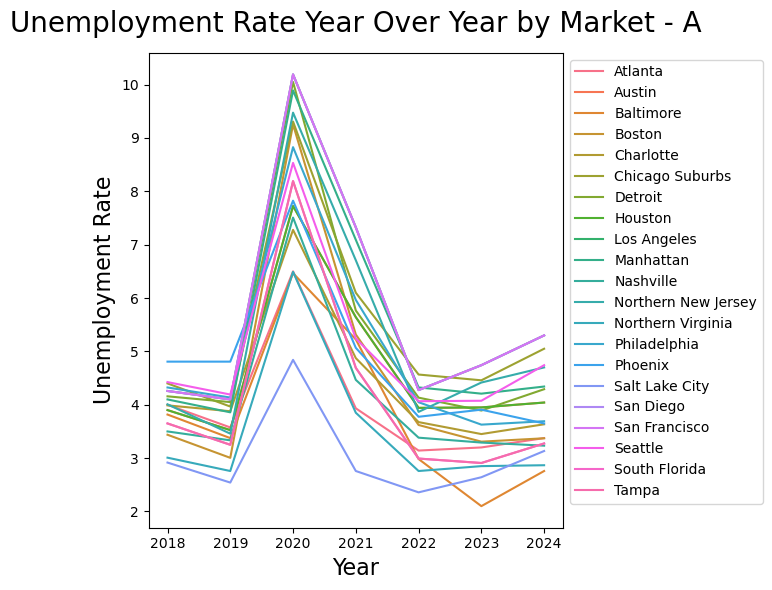

In [477]:
plt.figure(figsize=(7, 6))
sns.lineplot(data=merged_sorted_df_A, x='year', y='unemployment_rate', hue='market', ci=None)
plt.title('Unemployment Rate Year Over Year by Market - A', fontsize = 20, pad=15)
plt.xlabel('Year', fontsize = 16)
plt.ylabel('Unemployment Rate', fontsize = 16)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))


plt.tight_layout()
plt.show()

In [478]:
filler = df[df['market'] == 'San Francisco']
filler

,year,quarter,monthsigned,market,building_name,building_id,address,region,city,state,...,overall_rent,direct_available_space,direct_availability_proportion,direct_internal_class_rent,direct_overall_rent,sublet_available_space,sublet_availability_proportion,sublet_internal_class_rent,sublet_overall_rent,leasing
2272,2018,Q1,1.0,San Francisco,100 First,San Francisco_Financial District South_San Fra...,100 First St,West,San Francisco,CA,...,67.099766,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1147511.0
2273,2018,Q1,1.0,San Francisco,100 Spear St,San Francisco_Financial District South_San Fra...,101 Mission St,West,San Francisco,CA,...,67.099766,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1147511.0
2274,2018,Q1,1.0,San Francisco,104 Sutter St,San Francisco_Financial District North_San Fra...,101 Montgomery St,West,San Francisco,CA,...,67.099766,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1147511.0
2275,2018,Q1,1.0,San Francisco,104 Sutter St,San Francisco_Financial District North_San Fra...,101 Montgomery St,West,San Francisco,CA,...,67.099766,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1147511.0
2276,2018,Q1,1.0,San Francisco,163 Main St,San Francisco_Financial District South_San Fra...,160 Spear St,West,San Francisco,CA,...,67.099766,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1147511.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194650,2024,Q4,12.0,San Francisco,Transamerica Pyramid,San Francisco_Financial District North_San Fra...,600 Montgomery St,West,San Francisco,CA,...,67.840000,15130057.0,0.1705,80.246421,71.164767,4339491.0,0.0489,57.645331,56.845306,1379981.0
194651,2024,Q4,12.0,San Francisco,Two Embarcadero Center,San Francisco_Financial District North_San Fra...,Two Embarcadero Ctr,West,San Francisco,CA,...,67.840000,15130057.0,0.1705,80.246421,71.164767,4339491.0,0.0489,57.645331,56.845306,1379981.0
194652,2024,Q4,12.0,San Francisco,NaN,San Francisco_Financial District North_San Fra...,50 California St,West,San Francisco,CA,...,67.840000,15130057.0,0.1705,80.246421,71.164767,4339491.0,0.0489,57.645331,56.845306,1379981.0
194653,2024,Q4,12.0,San Francisco,NaN,San Francisco_Financial District South_San Fra...,535 Mission St,West,San Francisco,CA,...,67.840000,15130057.0,0.1705,80.246421,71.164767,4339491.0,0.0489,57.645331,56.845306,1379981.0


In [479]:
filler = filler.dropna(subset = ["availability_proportion"])
filler

,year,quarter,monthsigned,market,building_name,building_id,address,region,city,state,...,overall_rent,direct_available_space,direct_availability_proportion,direct_internal_class_rent,direct_overall_rent,sublet_available_space,sublet_availability_proportion,sublet_internal_class_rent,sublet_overall_rent,leasing
2272,2018,Q1,1.0,San Francisco,100 First,San Francisco_Financial District South_San Fra...,100 First St,West,San Francisco,CA,...,67.099766,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1147511.0
2273,2018,Q1,1.0,San Francisco,100 Spear St,San Francisco_Financial District South_San Fra...,101 Mission St,West,San Francisco,CA,...,67.099766,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1147511.0
2274,2018,Q1,1.0,San Francisco,104 Sutter St,San Francisco_Financial District North_San Fra...,101 Montgomery St,West,San Francisco,CA,...,67.099766,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1147511.0
2275,2018,Q1,1.0,San Francisco,104 Sutter St,San Francisco_Financial District North_San Fra...,101 Montgomery St,West,San Francisco,CA,...,67.099766,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1147511.0
2276,2018,Q1,1.0,San Francisco,163 Main St,San Francisco_Financial District South_San Fra...,160 Spear St,West,San Francisco,CA,...,67.099766,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1147511.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194650,2024,Q4,12.0,San Francisco,Transamerica Pyramid,San Francisco_Financial District North_San Fra...,600 Montgomery St,West,San Francisco,CA,...,67.840000,15130057.0,0.1705,80.246421,71.164767,4339491.0,0.0489,57.645331,56.845306,1379981.0
194651,2024,Q4,12.0,San Francisco,Two Embarcadero Center,San Francisco_Financial District North_San Fra...,Two Embarcadero Ctr,West,San Francisco,CA,...,67.840000,15130057.0,0.1705,80.246421,71.164767,4339491.0,0.0489,57.645331,56.845306,1379981.0
194652,2024,Q4,12.0,San Francisco,NaN,San Francisco_Financial District North_San Fra...,50 California St,West,San Francisco,CA,...,67.840000,15130057.0,0.1705,80.246421,71.164767,4339491.0,0.0489,57.645331,56.845306,1379981.0
194653,2024,Q4,12.0,San Francisco,NaN,San Francisco_Financial District South_San Fra...,535 Mission St,West,San Francisco,CA,...,67.840000,15130057.0,0.1705,80.246421,71.164767,4339491.0,0.0489,57.645331,56.845306,1379981.0


In [480]:
f_relevant = filler[['year','quarter', 'market', 'region', 'city', 'state', 'internal_class', 'leasedSF', 'RBA', 'availability_proportion', 'internal_class_rent', 'overall_rent']]
f_relevant

,year,quarter,market,region,city,state,internal_class,leasedSF,RBA,availability_proportion,internal_class_rent,overall_rent
2272,2018,Q1,San Francisco,West,San Francisco,CA,A,11273.0,44952535.0,0.094436,68.809148,67.099766
2273,2018,Q1,San Francisco,West,San Francisco,CA,A,4064.0,44952535.0,0.094436,68.809148,67.099766
2274,2018,Q1,San Francisco,West,San Francisco,CA,A,5234.0,44952535.0,0.094436,68.809148,67.099766
2275,2018,Q1,San Francisco,West,San Francisco,CA,A,6051.0,44952535.0,0.094436,68.809148,67.099766
2276,2018,Q1,San Francisco,West,San Francisco,CA,A,31718.0,44952535.0,0.094436,68.809148,67.099766
...,...,...,...,...,...,...,...,...,...,...,...,...
194650,2024,Q4,San Francisco,West,San Francisco,CA,A,5727.0,56646699.0,0.344000,75.210000,67.840000
194651,2024,Q4,San Francisco,West,San Francisco,CA,A,4835.0,56646699.0,0.344000,75.210000,67.840000
194652,2024,Q4,San Francisco,West,San Francisco,CA,A,19418.0,56646699.0,0.344000,75.210000,67.840000
194653,2024,Q4,San Francisco,West,San Francisco,CA,A,19014.0,56646699.0,0.344000,75.210000,67.840000
